In [1]:
import classes
parameters = classes.Empty()
start_position = classes.PosAndTime()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
# Параметры модели:
parameters.lmbda = 1    # Целевая средняя длина свободного пробега
parameters.velocity = 1 # Скорость (одинаковая для всех частиц и всех моментов времени)

start_guide_cosines = classes.GuideCosines \
        (a=0.5, b=0.5, c=0.5**0.5) # Направляющие косинусы при t = 0

time_limit = 500        # Время моделирования в единицах лямбда / v 

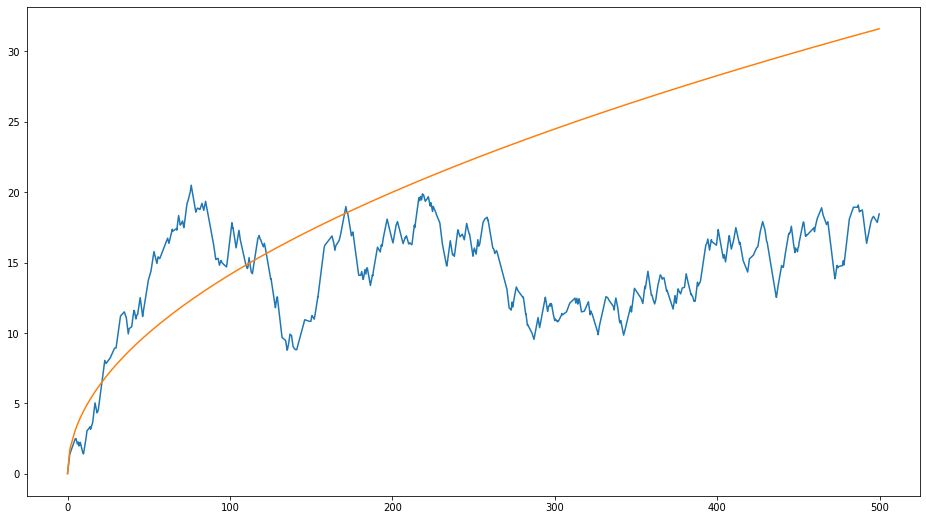

In [31]:
import cycles
one_particle_path = cycles.simulate_one_particle(parameters, start_position, start_guide_cosines, time_limit)
#one_particle_path :: [{x, y, z, t}]

distances = list(map(lambda obj : obj.distance(), one_particle_path))
times     = list(map(lambda obj : obj.t,          one_particle_path))

import theory
theory.setParameters(parameters)
predictions = list(map(theory.distance, times))

from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(times, distances, times, predictions)

In [32]:
Nparticles = 500

In [33]:
arar = cycles.simulate_multiple_particles(parameters, Nparticles, start_position, start_guide_cosines, time_limit)

In [34]:
tar, mar = cycles.meanDistance(arar, time_limit)

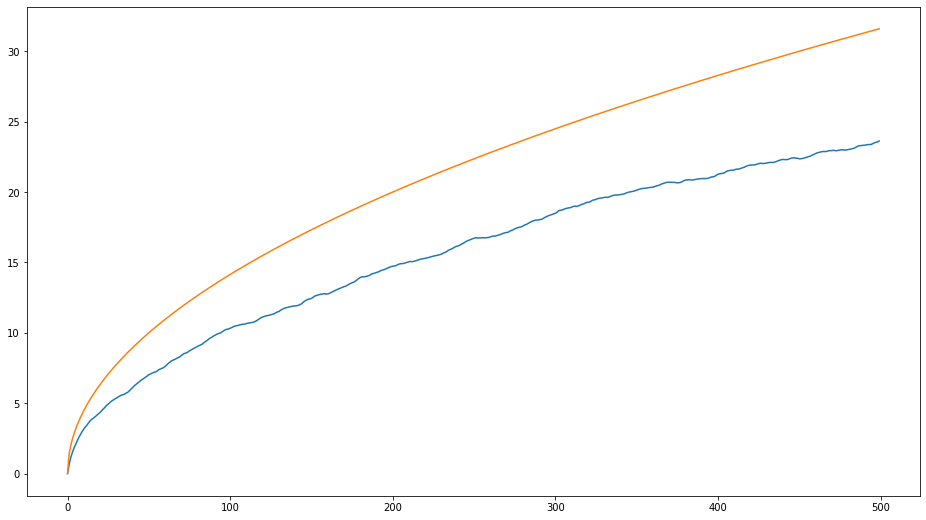

In [35]:
predictions = list(map(theory.distance, tar))

plt.figure(figsize=(16,9))
plt.plot(tar, mar, tar, predictions)

In [36]:
mar[99] / predictions[99]

0.7296156784635831

In [37]:
predictions[399] / mar[399]

1.3326493851664305

In [12]:
mar[99] * 9 / 4 - predictions[99]

2.56741371950834

In [13]:
(x, y, z) = cycles.xyDistribution(arar, 50)

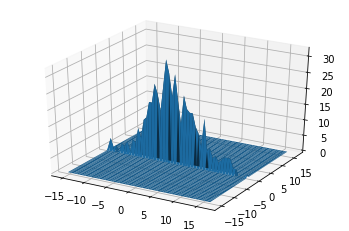

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x,y,z)
plt.show()

In [15]:
y

array([[-15.2338318 , -15.2338318 , -15.2338318 , ..., -15.2338318 ,
        -15.2338318 , -15.2338318 ],
       [-14.58424907, -14.58424907, -14.58424907, ..., -14.58424907,
        -14.58424907, -14.58424907],
       [-13.93466634, -13.93466634, -13.93466634, ..., -13.93466634,
        -13.93466634, -13.93466634],
       ...,
       [ 15.29655655,  15.29655655,  15.29655655, ...,  15.29655655,
         15.29655655,  15.29655655],
       [ 15.94613928,  15.94613928,  15.94613928, ...,  15.94613928,
         15.94613928,  15.94613928],
       [ 16.59572201,  16.59572201,  16.59572201, ...,  16.59572201,
         16.59572201,  16.59572201]])

In [16]:
arar[2][2].x

-2.16695966501435

In [17]:
time_limit

50

In [18]:
parameters.lmbda

1

In [45]:
arar[28][100].y

-5.615207612219343